In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
papers = pd.read_csv('./data_face/data_23to27_112023.csv')
# convert type of column
papers.rename(columns={'text': 'paper_text'}, inplace=True)
papers['paper_text'].astype(str)
# Print head
# print(papers.head())
# print(papers.shape)
# print(papers['paper_text'][0])
# print(papers['location'][0])
# print(papers['person'][0])
# print(papers['organization'][0])

/tmp/ipykernel_85678/837528560.py:4: DtypeWarning: Columns (0,4,17,21,22,23,31,32,33,38,43,49,50,52,53) have mixed types. Specify dtype option on import or set low_memory=False.
  papers = pd.read_csv('./data_face/data_23to27_112023.csv')


0        Thế là cũng xong xuôi nhập học rồi nhỉ? Mini g...
1        THÔNG BÁO THAM DỰ “GALA CHUNG KẾT CUỘC THI MAR...
2        Thời gian sắp hết rồi, đăng ký sớm các em nhé!...
3        Bạn rơi ví ơi nếu bạn thấy bài viết này thì bạ...
4        Do chuyển nơi làm việc nên mình cần #Nhượng ph...
                               ...                        
16745    Xin phép admin ạ\n[TOÀN QUỐC] TUYỂN THÀNH VIE...
16746    [BigData] Trung tâm công nghệ thông tin MobiF...
16747    [Cầu Giấy] Tết đến nơi rồi vẫn bơ vơ? Gia nhập...
16748    Công ty Technology Innovation Hub tuyển thực t...
16749    [BOXLINK] Tuyển dụng\n\n🍀 🍀 🍀 1 Lập trình viên...
Name: paper_text, Length: 16750, dtype: object

In [3]:
papers['post_id'][2]

'1073025240395961.0'

In [32]:
print(papers.columns)

Index(['post_id', 'paper_text', 'post_text', 'shared_text', 'original_text',
       'time', 'timestamp', 'image', 'image_lowquality', 'images',
       'images_description', 'images_lowquality',
       'images_lowquality_description', 'video', 'video_duration_seconds',
       'video_height', 'video_id', 'video_quality', 'video_size_MB',
       'video_thumbnail', 'video_watches', 'video_width', 'likes', 'comments',
       'shares', 'post_url', 'link', 'links', 'user_id', 'username',
       'user_url', 'is_live', 'factcheck', 'shared_post_id', 'shared_time',
       'shared_user_id', 'shared_username', 'shared_post_url', 'available',
       'comments_full', 'reactors', 'w3_fb_url', 'reactions', 'reaction_count',
       'with', 'page_id', 'sharers', 'image_id', 'image_ids', 'was_live',
       'header', 'fetched_time', 'video_ids', 'videos'],
      dtype='object')


In [33]:
papers.head()

post_id                                         paper_text  \
0   837097513988736.0  Thế là cũng xong xuôi nhập học rồi nhỉ? Mini g...   
1  1073529350345550.0  THÔNG BÁO THAM DỰ “GALA CHUNG KẾT CUỘC THI MAR...   
2  1073025240395961.0  Thời gian sắp hết rồi, đăng ký sớm các em nhé!...   
3  1072473063784512.0  Bạn rơi ví ơi nếu bạn thấy bài viết này thì bạ...   
4  1069154947449657.0  Do chuyển nơi làm việc nên mình cần #Nhượng ph...   

                                           post_text  \
0  Thế là cũng xong xuôi nhập học rồi nhỉ? Mini g...   
1  THÔNG BÁO THAM DỰ “GALA CHUNG KẾT CUỘC THI MAR...   
2  Thời gian sắp hết rồi, đăng ký sớm các em nhé!...   
3  Bạn rơi ví ơi nếu bạn thấy bài viết này thì bạ...   
4  Do chuyển nơi làm việc nên mình cần #Nhượng ph...   

                                         shared_text original_text  \
0                                                NaN           NaN   
1                                                NaN           NaN   
2  DAOTAO.PTIT.EDU.VN\nTHÔNG BÁO KẾ HOẠCH TỔ CHỨC...           NaN   
3                                                NaN           NaN   
4                                                NaN           NaN   

                  time     timestamp  \
0  2022-10-12 19:58:21  1.665580e+09   
1  2023-11-24 10:02:19  1.700795e+09   
2  2023-11-23 09:12:34  1.700706e+09   
3  2023-11-22 07:57:12  1.700615e+09   
4  2023-11-15 22:35:56  1.700063e+09   

                                               image  \
0                                                NaN   
1  https://scontent.fhan17-1.fna.fbcdn.net/v/t39....   
2                                                NaN   
3  https://scontent.fhan17-1.fna.fbcdn.net/v/t39....   
4  https://scontent.fhan17-1.fna.fbcdn.net/v/t39....   

                                    image_lowquality  \
0  https://scontent.fhan17-1.fna.fbcdn.net/v/t39....   
1  https://scontent.fhan17-1.fna.fbcdn.net/v/t39....   
2  https://external.fhan17-1.fna.fbcdn.net/emg1/v...   
3  https://scontent.fhan17-1.fna.fbcdn.net/v/t39....   
4  https://scontent.fhan17-1.fna.fbcdn.net/v/t39....   

                                              images  ...  \
0                                                 []  ...   
1  ['https://scontent.fhan17-1.fna.fbcdn.net/v/t3...  ...   
2                                                 []  ...   
3  ['https://scontent.fhan17-1.fna.fbcdn.net/v/t3...  ...   
4  ['https://scontent.fhan17-1.fna.fbcdn.net/v/t3...  ...   

                                                with page_id sharers  \
0  [{'name': 'D22 PTIT Hà Nội', 'link': 'https://...     NaN     NaN   
1  [{'name': 'D22 PTIT Hà Nội', 'link': 'https://...     NaN     NaN   
2  [{'name': 'D22 PTIT Hà Nội', 'link': 'https://...     NaN     NaN   
3  [{'name': 'D22 PTIT Hà Nội', 'link': 'https://...     NaN     NaN   
4  [{'name': 'D22 PTIT Hà Nội', 'link': 'https://...     NaN     NaN   

       image_id             image_ids  was_live  \
0  8.498442e+14   ['849844182837437']     False   
1  1.547874e+15  ['1547874392710562']     False   
2           NaN                    []     False   
3           NaN                    []     False   
4           NaN                    []     False   

                           header                fetched_time  video_ids  \
0      Diễm Quỳnh‎D22 PTIT Hà Nội  2023-11-25 10:15:08.966297        NaN   
1        Duong Ng‎D22 PTIT Hà Nội  2023-11-25 10:15:37.885462        NaN   
2      Pika Chuss‎D22 PTIT Hà Nội  2023-11-25 10:15:39.801065        NaN   
3       Mạnh Tùng‎D22 PTIT Hà Nội  2023-11-25 10:15:44.473826        NaN   
4  Trần Hồng Hạnh‎D22 PTIT Hà Nội  2023-11-25 10:15:49.121377        NaN   

  videos  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN  

[5 rows x 54 columns]

In [59]:
import numpy as np
# duplicated
print(papers.duplicated().sum())
papers.drop_duplicates(inplace=True)

# drop nan
papers.dropna(axis=0, inplace=True, subset=['paper_text','time'])
# drop inf
papers.replace([np.inf, -np.inf], np.nan, inplace=True)
papers.replace('', np.nan, inplace=True)
papers.dropna(inplace=True,how='any',axis=0, subset=['paper_text','time'])
# Remove the columns
try:
    papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1).sample(100)
except:
    pass

# Print out the first rows of papers
print(papers.head())
print(papers.info())
papers.reset_index(inplace=True, drop=True)

0
              post_id                                         paper_text  \
0   837097513988736.0  Thế là cũng xong xuôi nhập học rồi nhỉ? Mini g...   
1  1073529350345550.0  THÔNG BÁO THAM DỰ “GALA CHUNG KẾT CUỘC THI MAR...   
2  1073025240395961.0  Thời gian sắp hết rồi, đăng ký sớm các em nhé!...   
3  1072473063784512.0  Bạn rơi ví ơi nếu bạn thấy bài viết này thì bạ...   
4  1069154947449657.0  Do chuyển nơi làm việc nên mình cần #Nhượng ph...   

                                           post_text  \
0  Thế là cũng xong xuôi nhập học rồi nhỉ? Mini g...   
1  THÔNG BÁO THAM DỰ “GALA CHUNG KẾT CUỘC THI MAR...   
2  Thời gian sắp hết rồi, đăng ký sớm các em nhé!...   
3  Bạn rơi ví ơi nếu bạn thấy bài viết này thì bạ...   
4  Do chuyển nơi làm việc nên mình cần #Nhượng ph...   

                                         shared_text original_text  \
0                                                NaN           NaN   
1                                                NaN           N

In [60]:
# get timestamps
timestamps = papers.time.to_list()

print(timestamps)
import datetime
import re

timestamps1 = [str(time).split()[0] for time in timestamps]
# print(timestamps1)
# for timestamp in timestamps1:
#     print(timestamp)
#     datetime.datetime.strptime(timestamp, "%Y-%m-%d").date()
timestamp_ = [datetime.datetime.strptime(timestamp, "%Y-%m-%d").date() for timestamp in timestamps1]
print(timestamp_)
timestamp_ = [str(time.year)+'-'+str(time.month)+'-'+str(time.day) for time in timestamp_]
print(timestamp_)

['2022-10-12 19:58:21', '2023-11-24 10:02:19', '2023-11-23 09:12:34', '2023-11-22 07:57:12', '2023-11-15 22:35:56', '2023-11-20 10:46:08', '2023-11-18 08:52:31', '2023-11-17 21:46:06', '2023-11-16 21:41:49', '2023-11-16 16:44:32', '2023-11-16 23:16:00', '2023-11-14 15:54:38', '2023-11-13 17:35:09', '2023-11-09 00:31:54', '2023-11-07 16:18:12', '2023-11-08 16:13:53', '2023-11-07 10:11:00', '2023-10-28 20:28:53', '2023-10-29 19:57:07', '2023-09-27 22:55:13', '2023-11-08 09:52:26', '2023-10-25 19:32:33', '2023-10-27 10:44:03', '2023-11-06 07:56:32', '2023-10-27 15:00:32', '2023-10-28 18:57:43', '2022-10-30 08:49:31', '2022-10-30 08:49:31', '2023-10-27 20:12:46', '2023-10-27 20:04:21', '2023-10-27 12:00:47', '2023-10-24 20:40:28', '2023-10-19 17:13:03', '2023-10-24 20:18:50', '2023-10-25 17:50:42', '2023-10-23 09:50:28', '2023-10-18 20:01:10', '2023-10-18 12:18:46', '2023-10-18 00:17:27', '2023-10-16 16:07:49', '2023-10-15 20:43:26', '2023-10-14 10:07:40', '2023-10-13 10:13:06', '2023-10-1

In [36]:
# Load the regular expression library
import re

# Remove punctuation
papers['paper_text_processed'] = papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))
# replace \n
papers['paper_text_processed'] = papers['paper_text_processed'].map(lambda x: re.sub('\n', ' ', x))
# Convert the titles to lowercase
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())
papers.reset_index(inplace=True, drop=True)
# Print out the first rows of papers
print(papers['paper_text_processed'][0])
print(papers['paper_text_processed'][1])
print(papers['paper_text_processed'][2])

thế là cũng xong xuôi nhập học rồi nhỉ mini game nhỏ không  đơn giản thôi cmt bất cứ điều gì bạn thấy ấn tượng nhất trong 2 ngày nhập học hoặc đơn giản là cảm nhận của bạn đính kèm ảnh\\video thì càng tốt  1xem thêm cmt nhiều like nhất chủ cmt sẽ được “đặc quyền” đăng bài không cần kiểm duyệt trong gr d22 kèm móc khoá độc quyền của tôi yêu ptit mình sẽ đóng cmt vào 20h ngày 13/10  welcome d22 #toiyeuptit
thông báo tham dự “gala chung kết cuộc thi marketing big day 2023”  ngày 24/11/2023 này gala chung kết cuộc thi marketing big day 2023 - “mind maze” sẽ chính thức được diễn ra với sự góp mặt của top 4 đội thi ưu tú với phần thể hiện vô cùng xuất sắc đã vượt qua vòng bán kết đầy cam go cùng với đó là sự hiện diện của các vị ban giám khảo với chuyên môn cao mang tới một chương trình đầy tính chuyên nghiệp và không kém phần hấp dẫn  không dừng lại ở đó tại gala chung kết sẽ có sự góp mặt của 2 ca sĩ nổi tiếng với các bản hit thuộc top trending hứa hẹn sẽ mang đến cho chương trình những ca

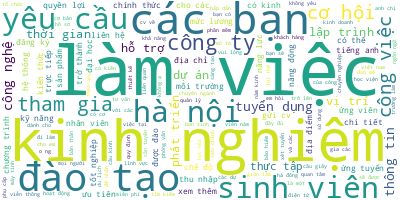

In [37]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [38]:


import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
nltk.download('punkt')
# from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from unidecode import unidecode
import string
import re
import pyvi
import json
import underthesea
from pyvi import ViTokenizer, ViPosTagger
from underthesea import word_tokenize
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
stop_words = set(open("./data_test/vietnamese-stopwords-dash.txt", "r", encoding="utf-8").read().splitlines())

def remove_whitespace(text):
    return re.sub(r'\s+', ' ', text).strip()

def remove_number(text):
    return re.sub(r'\d+', '', text).strip()

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def remove_punctuation_not_underscore(text): # remove dấu câu để lại dấu _
    # Tạo một bản sao của string.punctuation và loại bỏ dấu _
    punctuation = string.punctuation.replace("_", "")
    # punctuation = punctuation.replace("-", "")
    return text.translate(str.maketrans('', '', punctuation))

def remove_(text):
    text = remove_punctuation_not_underscore(text)
    text = remove_number(text)
    text = re.sub(r'[\x00-\x1F\x7F-\x9F]', '', text)
    text = text.replace("_  _", "_")
    return re.sub(r'“|”', '', text).strip()
    # return ''.join(char for char in text if char not in ['“', '”'])

def remove_punctuation_underscore(text): # remove dấu _
    punctuation = "_"
    return text.translate(str.maketrans('', '', punctuation))
    
def word_to_phrase(text): # chuyển từ thành cụm từ
    # return ViTokenizer.tokenize(text)
    return word_tokenize(text, format="text")

# def sent_to_words(sentences):
#     for sentence in sentences:
#         # deacc=True removes punctuations
#         # loại bỏ dấu câu and split
#         yield([remove_(str(word)) for word in re.findall(r'\w+|\S+', word_to_phrase(str(sentence))) if remove_(str(word)) != ''])

def remove_stopwords(texts):
    words = [word for word in texts.split() if word not in stop_words]
    words_to_sentence = ' '.join(words)
    return words_to_sentence.strip()

def remove_emoj(text):
    emoj = re.compile("["
                        u"\U0001F600-\U0001F64F"  # emoticons
                        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                        u"\U0001F680-\U0001F6FF"  # transport & map symbols
                        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                        u"\U00002500-\U00002BEF"  # chinese char
                        u"\U00002702-\U000027B0"
                        u"\U00002702-\U000027B0"
                        u"\U000024C2-\U0001F251"
                        u"\U0001f926-\U0001f937"
                        u"\U00010000-\U0010ffff"
                        u"\u2640-\u2642" 
                        u"\u2600-\u2B55"
                        u"\u200d"
                        u"\u23cf"
                        u"\u23e9"
                        u"\u231a"
                        u"\ufe0f"  # dingbats
                        u"\u3030"
                                    "]+", re.UNICODE)
    return re.sub(emoj, '', text)

# drop word while # in word
def remove_word_hash(text):
    # text = re.sub(r'#.*', '', text).strip() # remove word all while # before
    return re.sub(r'#\w+', '', text).strip()
# drop url
def remove_url(text):
    text = re.sub(r'http\S+', '', text).strip()
    text = re.sub(r'www\S+', '', text).strip()
    text = re.sub(r'pic\S+', '', text).strip()
    text = re.sub(r'bit.ly\S+', '', text).strip()
    text = re.sub(r'fb\S+', '', text).strip()
    text = re.sub(r'com\S+', '', text).strip()
    text = re.sub(r'https\S+', '', text).strip()
    return text

# drop email
def remove_email(text):
    # \S kí tự không phải khoảng trắng
    # \S* kí tự không phải khoảng trắng xuất hiện 0 hoặc nhiều lần
    # \s? có thể có hoặc không có khoảng trắng cuối chuỗi
    return re.sub(r'\S*@\S*\s?', '', text).strip()

# scale word summary
def scale_word_summary(text):
    with open('./data_test/word_summary.json', 'r', encoding='utf-8') as f:
        word_summary = json.load(f)
    text = text.split()
    for i, word in enumerate(text):
        for key, value in word_summary.items():
            key = key.split('|')
            if word in key:
                text[i] = re.sub(r'\s+','_',value)
    return ' '.join(text)

# drop syntax
def pos_tagging_drop(text):
    list_dict = underthesea.pos_tag(text)
    list_word = []
    for i,val in list_dict:
        if val not in ['CH', 'L', 'M', 'R', 'E', 'C', 'I', 'T', 'X', 'Y']:
            list_word.append(i) # P, N, V, A, 'Np', 'Nc', 'Nu'
    return ' '.join(list_word)

# drop_special_character_in_word
def remove_special_character_in_word(text):
    text = re.sub(r'\w+[\+\-\/\*\%\=\:\(\)\[\]\{\}]\w+\s?', '', text).strip()
    text = re.sub(r'[\#\+\-\/\*\%\=\:\(\)\[\]\{\}]\w+\s?', '', text).strip()
    text = re.sub(r'\w+[\+\-\/\*\%\=\:\(\)\[\]\{\}]\s?', '', text).strip()
    return text

def drop_(text):
    text = re.sub(re.escape('gửi offical'), '', text).strip()
    return text
data = papers['paper_text_processed']
print('text 0: ',data[0])
print('text 1: ',data[1])
print('text 2: ',data[2])
data = data.apply(lambda x: remove_whitespace(x)) # remove whitespace (tab, \n, \r)
data = data.apply(lambda x: remove_punctuation_underscore(x))
data = data.apply(lambda x: scale_word_summary(x)) # scale word summary (mjk -> mình)
data = data.apply(lambda x: remove_word_hash(x)) # remove word hash (#) hashtag
data = data.apply(lambda x: remove_special_character_in_word(x)) # remove special character in word ("***dung" -> "")
## data = data.apply(lambda x: remove_punctuation(x)) # remove punctuation (.,!?) 
data = data.apply(lambda x: pos_tagging_drop(x)) # pos tagging drop (Ngày mai, tôi sẽ đi học -> Ngày mai, tôi đi học)
data = data.apply(lambda x: remove_emoj(x)) # remove emoj (😂)

data = data.apply(lambda x: remove_email(x)) # remove email (gmail.com)
data = data.apply(lambda x: remove_url(x)) # remove url (https://www.facebook.com)
data = data.apply(lambda x: remove_number(x)) # remove number (123)
data = data.apply(lambda x: word_to_phrase(x)) # word to phrase (tôi là ai -> tôi_là_ai)
data = data.apply(lambda x: remove_(x))
data = data.apply(lambda x: remove_stopwords(x))
data = data.apply(lambda x: remove_whitespace(x)) # remove whitespace (tab, \n, \r)
data = data.apply(lambda x: drop_(x))
print('text 0: ',data[0])
print('text 1: ',data[1])
print('text 2: ',data[2])

# print(remove_stopwords(text))
docs = data.tolist()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/minhthuy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/minhthuy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


text 0:  thế là cũng xong xuôi nhập học rồi nhỉ mini game nhỏ không  đơn giản thôi cmt bất cứ điều gì bạn thấy ấn tượng nhất trong 2 ngày nhập học hoặc đơn giản là cảm nhận của bạn đính kèm ảnh\\video thì càng tốt  1xem thêm cmt nhiều like nhất chủ cmt sẽ được “đặc quyền” đăng bài không cần kiểm duyệt trong gr d22 kèm móc khoá độc quyền của tôi yêu ptit mình sẽ đóng cmt vào 20h ngày 13/10  welcome d22 #toiyeuptit
text 1:  thông báo tham dự “gala chung kết cuộc thi marketing big day 2023”  ngày 24/11/2023 này gala chung kết cuộc thi marketing big day 2023 - “mind maze” sẽ chính thức được diễn ra với sự góp mặt của top 4 đội thi ưu tú với phần thể hiện vô cùng xuất sắc đã vượt qua vòng bán kết đầy cam go cùng với đó là sự hiện diện của các vị ban giám khảo với chuyên môn cao mang tới một chương trình đầy tính chuyên nghiệp và không kém phần hấp dẫn  không dừng lại ở đó tại gala chung kết sẽ có sự góp mặt của 2 ca sĩ nổi tiếng với các bản hit thuộc top trending hứa hẹn sẽ mang đến cho chư

In [39]:
from umap import UMAP
from hdbscan import HDBSCAN
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.representation import KeyBERTInspired
from bertopic.vectorizers import ClassTfidfTransformer
from bertopic.vectorizers import OnlineCountVectorizer
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import IncrementalPCA
# Step 1 - Extract embeddings
embedding_model = SentenceTransformer("keepitreal/vietnamese-sbert")
# Step 2 - Reduce dimensionality
# umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine')
umap_model = IncrementalPCA(n_components=5)
# Step 3 - Cluster reduced embeddings
# hdbscan_model = HDBSCAN(min_cluster_size=15, metric='euclidean', cluster_selection_method='eom', prediction_data=True)
hdbscan_model = MiniBatchKMeans(n_clusters=5, random_state=0)
# Step 4 - Tokenize topics
stop_words = list(stop_words)
vectorizer_model = OnlineCountVectorizer(stop_words=stop_words)
# vectorizer_model = CountVectorizer(stop_words=stop_words)
# Step 5 - Create topic representation
ctfidf_model = ClassTfidfTransformer()
# Step 6 - (Optional) Fine-tune topic representations with 
# a `bertopic.representation` model
representation_model = KeyBERTInspired()

nr_topics = 5
top_n_words = 10
topic_model = BERTopic(
  embedding_model=embedding_model,          # Step 1 - Extract embeddings
  umap_model=umap_model,                    # Step 2 - Reduce dimensionality
  hdbscan_model=hdbscan_model,              # Step 3 - Cluster reduced embeddings
  vectorizer_model=vectorizer_model,        # Step 4 - Tokenize topics
  ctfidf_model=ctfidf_model,                # Step 5 - Extract topic words
  representation_model=representation_model, # Step 6 - (Optional) Fine-tune topic represenations
  language="vietnamese", calculate_probabilities=True, verbose=True, nr_topics=nr_topics, top_n_words=top_n_words
)
topic_model = topic_model.partial_fit(docs)

/home/minhthuy/anaconda3/envs/bertopic/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-11-27 18:58:11.767371: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-27 18:58:11.805562: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-27 18:58:11.805612: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-27 18:58:11.806875: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for

In [40]:
documents = topic_model.get_document_info(data)
documents_per_topic = documents.sort_values("Topic").groupby(['Topic'], as_index=False)
updated_topics = documents_per_topic.first().Topic.astype(int)
documents_per_topic = documents_per_topic.agg({'Document': ' '.join})
c_tf_idf,words = topic_model._c_tf_idf(documents_per_topic, partial_fit=False)
print(c_tf_idf)

# c_tf_idf = c_tf_idf.toarray()
# col=8267
# print(f'c_tf_idf of {col}: ',c_tf_idf[0][col])
# df = pd.DataFrame(c_tf_idf, columns=words,dtype='float64')
# print('------------------')
# key = 'văn_hóa'
# print(f'c_tf_idf of {key}:')
# print(df[key])
# # sort
# t = 9
# df = df[df.iloc[t].sort_values(ascending=False).index]

# print(df.iloc[t][0:10])
# print(df.iloc[t][0:10].index)
# print(topic_model.get_topic(t))
# _extract_words_per_topic

  (0, 37990)	0.00019705449089165117
  (0, 37968)	0.00022484334369121336
  (0, 37942)	0.00019705449089165117
  (0, 37906)	0.007730359274214702
  (0, 37901)	0.00018541995333066737
  (0, 37886)	0.00031965060926591836
  (0, 37884)	0.000695142198236259
  (0, 37883)	0.0010397874078179284
  (0, 37881)	0.00019705449089165117
  (0, 37866)	0.0004604511927262132
  (0, 37862)	0.0060266789970287215
  (0, 37860)	0.00017861424067213165
  (0, 37851)	0.00019705449089165117
  (0, 37843)	0.0003136129576329895
  (0, 37841)	0.00017861424067213165
  (0, 37837)	0.00019705449089165117
  (0, 37834)	0.00037083990666133475
  (0, 37824)	0.00019705449089165117
  (0, 37812)	0.00019705449089165117
  (0, 37810)	0.0018508069326299986
  (0, 37805)	0.00018541995333066737
  (0, 37804)	0.00015680647881649476
  (0, 37797)	0.00018541995333066737
  (0, 37791)	0.00040062465104920004
  (0, 37789)	0.000133164470858725
  :	:
  (4, 455)	0.0009763313262423648
  (4, 447)	0.0002239096436639309
  (4, 440)	0.0003973875508895547
  (4, 

In [41]:
# from bertopic.representation import BaseRepresentation
# documents = topic_model.get_document_info(data)
# documents_per_topic = documents.sort_values("Topic").groupby(['Topic'], as_index=False)
# updated_topics = documents_per_topic.first().Topic.astype(int)
# documents_per_topic = documents_per_topic.agg({'Document': ' '.join})
# c_tf_idf,words = topic_model._c_tf_idf(documents_per_topic, partial_fit=False)
# # print(c_tf_idf)

# topics = topic_model.topics_
# documents = pd.DataFrame({"Document": docs, "Topic": topics, "ID": range(len(docs)), "Image": range(len(docs))})
# # topic_representations = topic_model._extract_words_per_topic(words, documents, c_tf_idf, False)
# # topic_representations

# labels = sorted(list(documents.Topic.unique()))
# labels = [int(label) for label in labels]

# top_n_words = 9170
# indices = topic_model._top_n_idx_sparse(c_tf_idf, n=top_n_words)
# scores = topic_model._top_n_values_sparse(c_tf_idf, indices)
# sorted_indices = np.argsort(scores)
# indices = np.take_along_axis(indices, sorted_indices, axis=1)
# scores = np.take_along_axis(scores, sorted_indices, axis=1)
# topics = {label: [(words[word_index], score)
#                           if word_index is not None and score > 0
#                           else ("", 0.00001)
#                           for word_index, score in zip(indices[index][::-1], scores[index][::-1])
#                           ]
#                   for index, label in enumerate(labels)}
# # print(topics[0])
# if isinstance(topic_model.representation_model, list):
#     print(1)
#     for tuner in topic_model.representation_model:
#         topics = tuner.extract_topics(topic_model, documents, c_tf_idf, topics)
# elif isinstance(topic_model.representation_model, BaseRepresentation):
#     print(2)
#     topics = topic_model.representation_model.extract_topics(topic_model, documents, c_tf_idf, topics)
    
# elif isinstance(topic_model.representation_model, dict):
#     print(3)
#     if topic_model.representation_model.get("Main"):
#         topics = topic_model.representation_model["Main"].extract_topics(topic_model, documents, c_tf_idf, topics)

# topics = {label: values[:top_n_words] for label, values in topics.items()}
# print(topics[1])
# print(topics[5])

In [42]:
topics = topic_model.topic_representations_
print(topics[1])
print(topics[2])

[('tuyển_dụng', 0.43778628), ('đào_tạo', 0.3952936), ('phần_mềm', 0.33957082), ('lập_trình', 0.336209), ('thực_tập', 0.28778315), ('tốt_nghiệp', 0.2704113), ('làm_việc', 0.26983103), ('chính_thức', 0.26816183), ('chế_độ', 0.2668037), ('tuyển', 0.2658713)]
[('lớp', 0.99999964), ('học', 0.46667504), ('giấy', 0.44201663), ('sự_kiện', 0.43039143), ('gr', 0.4237255), ('truyền_thông', 0.40820938), ('trường', 0.40736187), ('môn', 0.39796993), ('quán', 0.39005405), ('admin', 0.38181484)]


In [43]:

topic_model.visualize_documents(docs)

In [44]:
topic_model.visualize_topics()

Các chủ đề được tạo có thể được giảm bớt theo thứ bậc. Để hiểu cấu trúc phân cấp tiềm năng của các chủ đề, chúng ta có thể sử dụng scipy.cluster.hierarchy để tạo các cụm và trực quan hóa cách chúng liên quan với nhau. Điều này có thể giúp chọn nr_topics thích hợp khi giảm số lượng chủ đề bạn đã tạo. Để hình dung hệ thống phân cấp này, hãy chạy như sau:

In [45]:
topic_model.visualize_hierarchy()

In [46]:
topic_model.visualize_barchart()

In [47]:
topic_model.visualize_heatmap()

rank c-tf-idf của các từ theo thứ tự giảm dần

In [48]:
topic_model.visualize_term_rank() # => visualize_term_rank (rank, score)

In [49]:
classes = [i for i in papers["post_id"]]
classes = [str(i) for i in classes] # convert to string
topics_per_class = topic_model.topics_per_class(docs, classes=classes)
# topic_model.visualize_topics_per_class(topics_per_class)

0it [00:00, ?it/s]

2087it [09:51,  3.53it/s]


KeyboardInterrupt: 

In [50]:
topics_per_class.columns

NameError: name 'topics_per_class' is not defined

In [ ]:

# count_cmt = []
# positive = []
# negative = []
# docs_len = [len(doc.split()) for doc in docs]
# papers['docs_len'] = docs_len
# doc_l = []
# for i in range(len(papers)):
#     for j in range(len(topics_per_class)):
#         if str(papers['post_id'][i]) == topics_per_class['Class'][j]:
#             count_cmt.append(papers['comments'][i])
#             positive.append(papers['positive'][i])
#             negative.append(papers['negative'][i])
# topics_per_class['Count_comments'] = count_cmt
# topics_per_class['positive'] = positive
# topics_per_class['negative'] = negative
# print(topics_per_class.shape)
# uni = topics_per_class['Name'].unique()
# print(uni)
# for i in range(len(topics_per_class)):
#     if topics_per_class['Name'][i] == uni[3]:
#         print(topics_per_class['Count_comments'][i])
# # gropby class
# _count_comments = topics_per_class.groupby(['Name'], as_index=False).agg({'Count_comments': 'sum'})
# _count_positive = topics_per_class.groupby(['Name'], as_index=False).agg({'positive': 'sum'})
# _count_negative = topics_per_class.groupby(['Name'], as_index=False).agg({'negative': 'sum'})
# print(_count_comments.head())
# print(_count_positive.head())
# print(_count_negative.head())

(20, 7)


KeyError: 'Name'

In [ ]:
# papers['docs_len'].describe()

count    20.000000
mean     38.250000
std      25.474187
min       2.000000
25%      20.500000
50%      40.000000
75%      50.250000
max      99.000000
Name: docs_len, dtype: float64

([<matplotlib.axis.XTick at 0x7f59601c12a0>,
 [Text(0, 0, '0'),
  Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(30, 0, '30'),
  Text(40, 0, '40'),
  Text(50, 0, '50'),
  Text(60, 0, '60'),
  Text(70, 0, '70'),
  Text(80, 0, '80'),
  Text(90, 0, '90'),
  Text(100, 0, '100'),
  Text(110, 0, '110'),
  Text(120, 0, '120'),
  Text(130, 0, '130'),
  Text(140, 0, '140')])

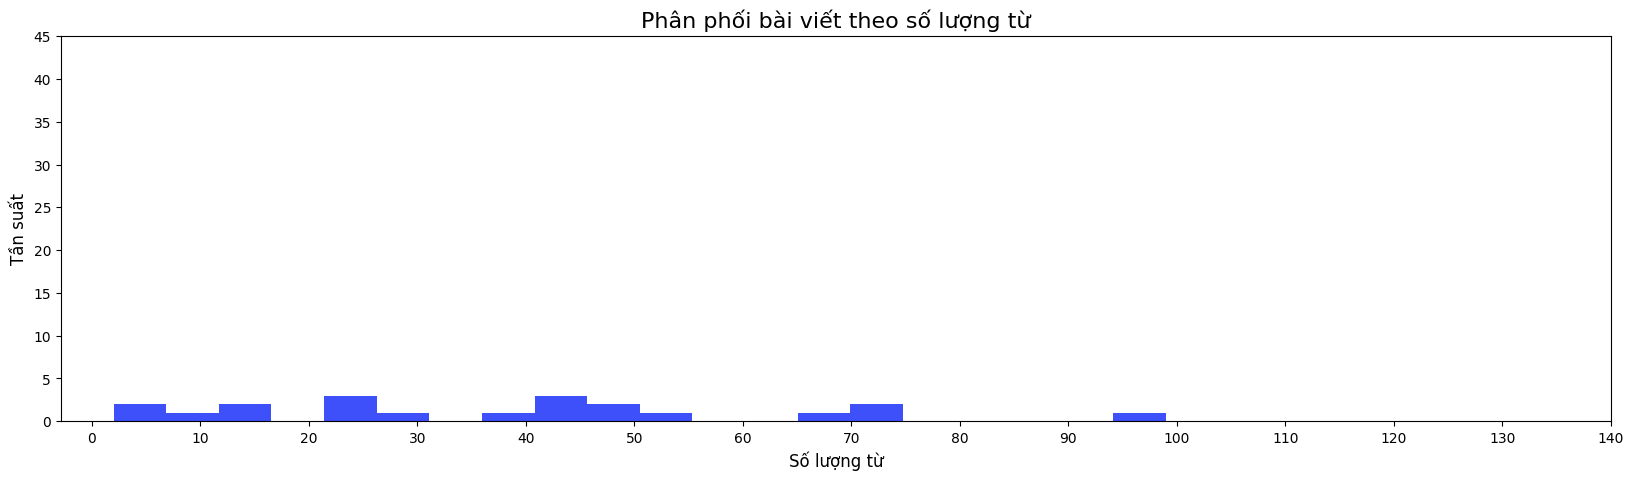

In [ ]:
# fig = plt.figure(figsize=(20,5))
# plt.hist(
#     papers['docs_len'],
#     bins=20,
#     color='#3D50FA'
# )

# plt.title('Phân phối bài viết theo số lượng từ', fontsize=16)
# plt.ylabel('Tần suất', fontsize=12)
# plt.xlabel('Số lượng từ', fontsize=12)
# plt.yticks(np.arange(0, 50, 5))
# plt.xticks(np.arange(0, 150, 10))

In [51]:
words = [word for doc in docs for word in doc.split()]
top_20_word = pd.DataFrame(Counter(words).most_common(20), columns=['word', 'frequency'])
top_20_word.head()

word  frequency
0     làm_việc       7305
1        lương       5891
2      đào_tạo       5830
3  kinh_nghiệm       5639
4    sinh_viên       5440

In [52]:
color_green = '#0AF712'
color_red='#FA4D43'
color_blue ='#3D50FA'
def autolabel(rects,ax):
    for rect in rects:
        height = rect.get_height() # get height of bar
        # ax.annotate -> add text for bar
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height), # x,y location of text
                    xytext=(0, 3),  # 3 points vertical offset # text location <-> height
                    textcoords="offset points",
                    ha='center', va='bottom')

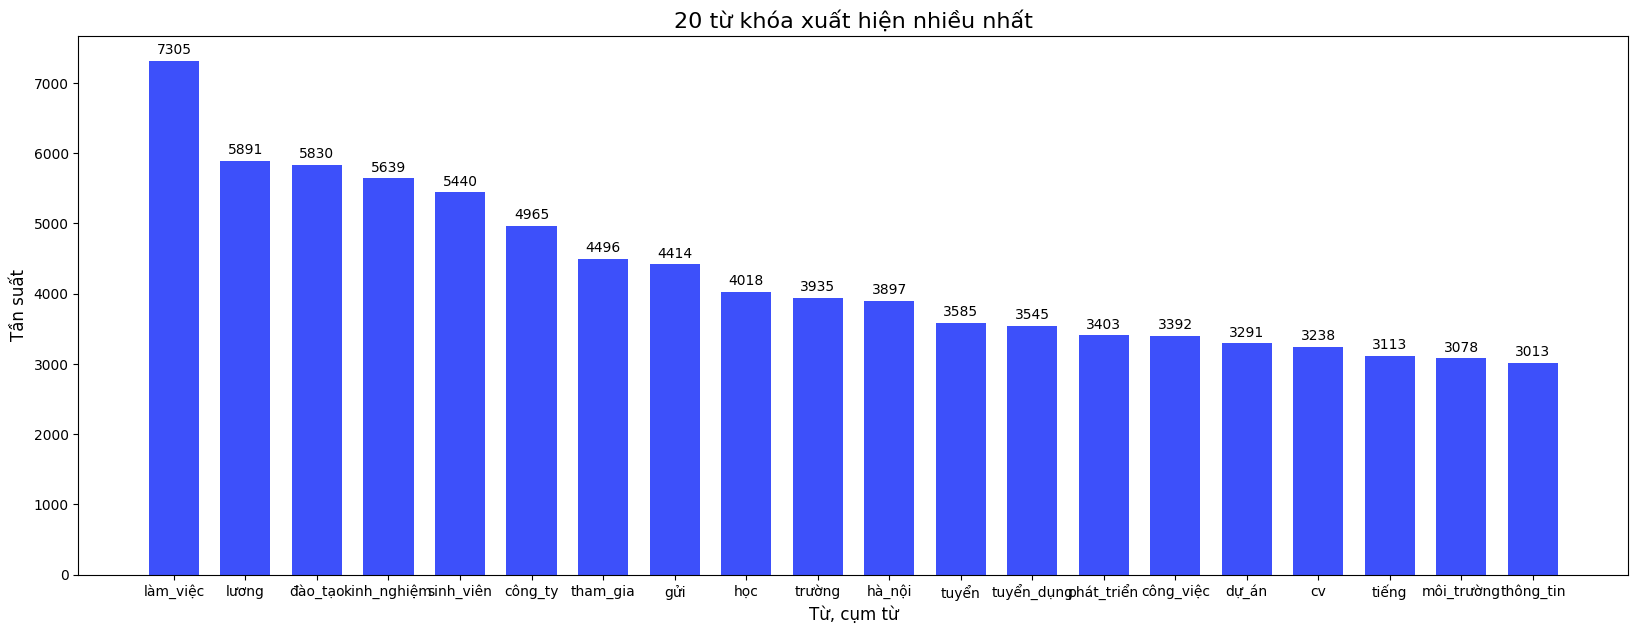

In [53]:
import seaborn as sns
width = 0.7 

fig,ax = plt.subplots(figsize=(20,7))
x = np.arange(top_20_word['word'].shape[0])
rect = ax.bar(x,top_20_word['frequency'],width, color=color_blue)

ax.set_xticks(x)
ax.set_xticklabels(top_20_word['word'])
ax.set_ylabel('Tần suất', fontsize=12)
ax.set_title('20 từ khóa xuất hiện nhiều nhất', fontsize=16)
ax.set_xlabel('Từ, cụm từ', fontsize=12)
autolabel(rect,ax)
plt.show()

In [54]:
# count_comments = _count_comments['Count_comments']
# count_positive = _count_positive['positive']
# count_negative = _count_negative['negative']
# x = np.arange(topic_model.nr_topics)
# width = 0.35/2 # the width of the bars
# # count values
count_values = topics_per_class['Name'].value_counts().sort_index()
# print(count_values)
# fig, (ax,ax1) = plt.subplots(2,figsize=(14, 7),dpi=200)
# rect_docs = ax.bar(x - width, count_values.values,width, color=color_blue,label='Số lượng bài báo')
# rect_p = ax.bar(x, count_positive.values,width, color=color_green,label='Số lượng bài báo tích cực')
# rect_n = ax.bar(x+width, count_negative.values,width, color=color_red,label='Số lượng bài báo tiêu cực')
# ax.set_xticks(x)
# ax.set_xticklabels(count_values.index)# , rotation=45
# ax.set_xlabel("Chủ đề")
# ax.set_ylabel("Số lượng")
# ax.set_title("Thống kê số lượng theo chủ đề")

# ax.legend()
# autolabel(rect_docs,ax)
# autolabel(rect_p,ax)
# autolabel(rect_n,ax)


# count_comments = _count_comments['Count_comments']
# rect_cmt = ax1.bar(x, count_comments.values,width, color='b',label='Số lượng bình luận')

# ax1.set_xticks(x)
# ax1.set_xticklabels(count_values.index)# , rotation=45
# ax1.set_xlabel("Chủ đề")
# ax1.set_ylabel("Số lượng")
# ax1.set_title("Thống kê số lượng bình luận theo chủ đề")

# ax1.legend()
# autolabel(rect_cmt,ax1)
# plt.show()

NameError: name 'topics_per_class' is not defined

In [55]:
_count_comments

NameError: name '_count_comments' is not defined

[0 1 2 3 4]
count
positive
negative


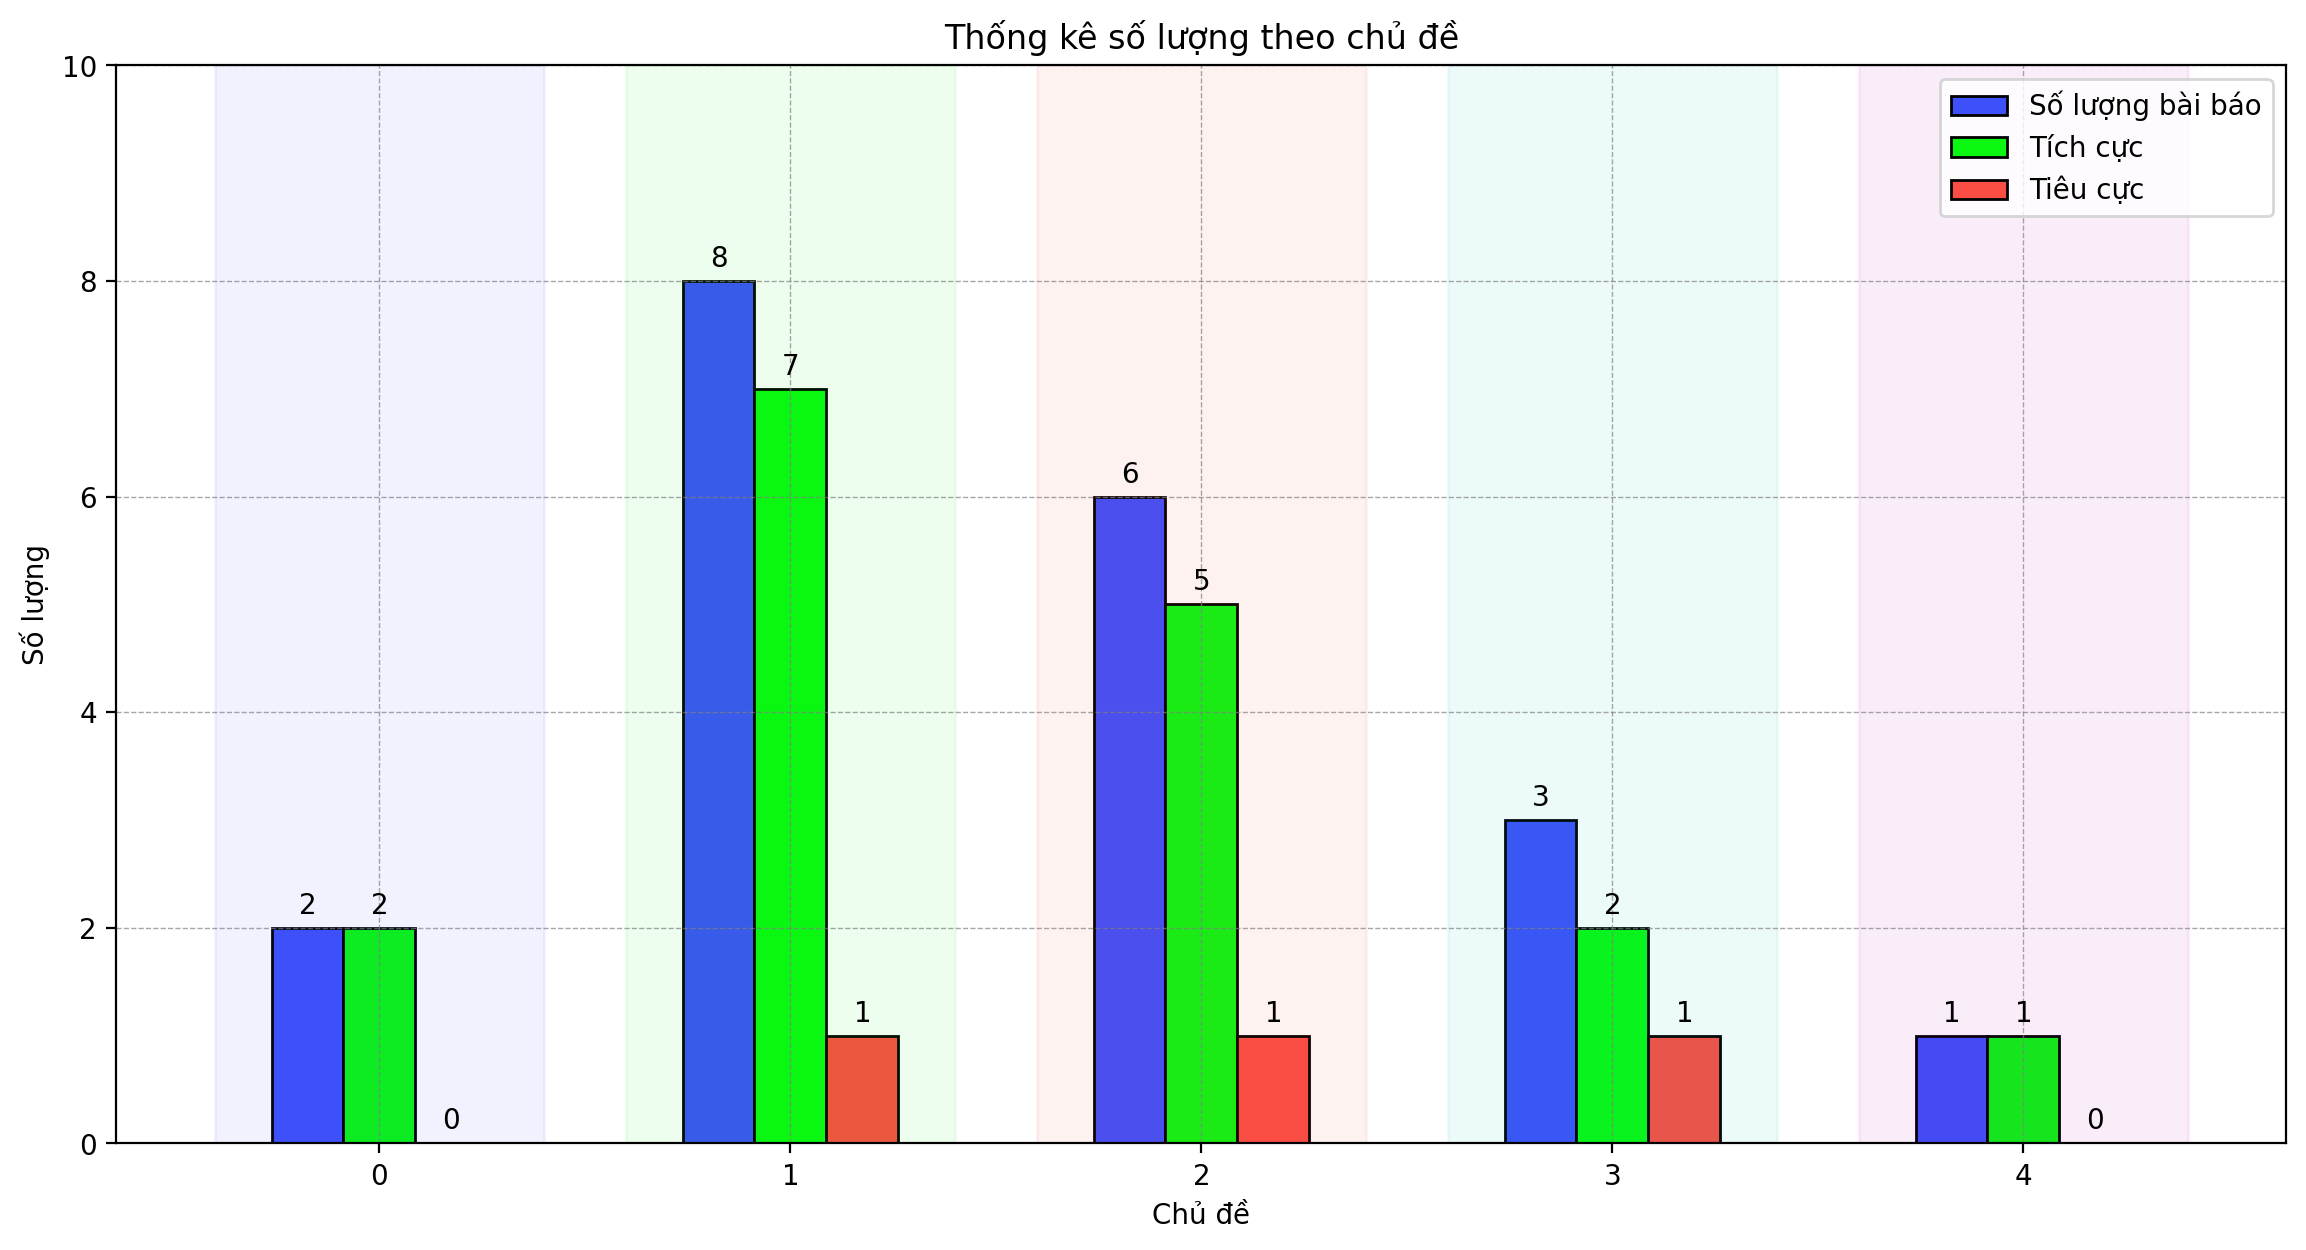

In [ ]:
# merge_df = pd.merge(_count_comments, _count_positive, on='Name')
merge_df = pd.merge(count_values, _count_positive, on='Name')
merge_df = pd.merge(merge_df, _count_negative, on='Name')
merge_df.head()
def plot_(data,title,h_lim=None):
    fig, ax = plt.subplots(1,1,figsize=(14, 7),dpi=200)
    ax.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
    if h_lim :
        ax.set_ylim(0, h_lim)
    index = data['Name'].values
    color = [color_blue,color_green, color_red, 'c','m','y','k','w']
    x = np.arange(len(index))
    
    span_arange = np.arange(0,data.shape[0])
    print(span_arange)
    width = 0.35/2 # the width of the bars
    mode = 0
    dict_ = {'positive':'Tích cực','negative':'Tiêu cực','count':'Số lượng bài báo','Count_comments':'Số lượng bình luận'}
    for i in range(1,data.shape[1]):
        print(data.columns[i])
        rect = ax.bar(x - width + mode, data.iloc[:,i].values,width,color=color[i-1], label=dict_[data.columns[i]],edgecolor='black')
        mode = mode + 0.35/2
        autolabel(rect,ax)
        
    for i in range(len(span_arange)):
        ax.axvspan(span_arange[i]-0.4,span_arange[i] + 0.4, alpha=0.07, color=color[i])
    ax.set_xticks(x)
    # ax.set_xticklabels(index)# , rotation=45
    ax.set_xlabel("Chủ đề")
    ax.set_ylabel("Số lượng")
    ax.set_title(title)
    
    ax.legend(loc='upper right')
    plt.show()
plot_(merge_df, "Thống kê số lượng theo chủ đề",10)

[0 1 2 3 4]
Count_comments


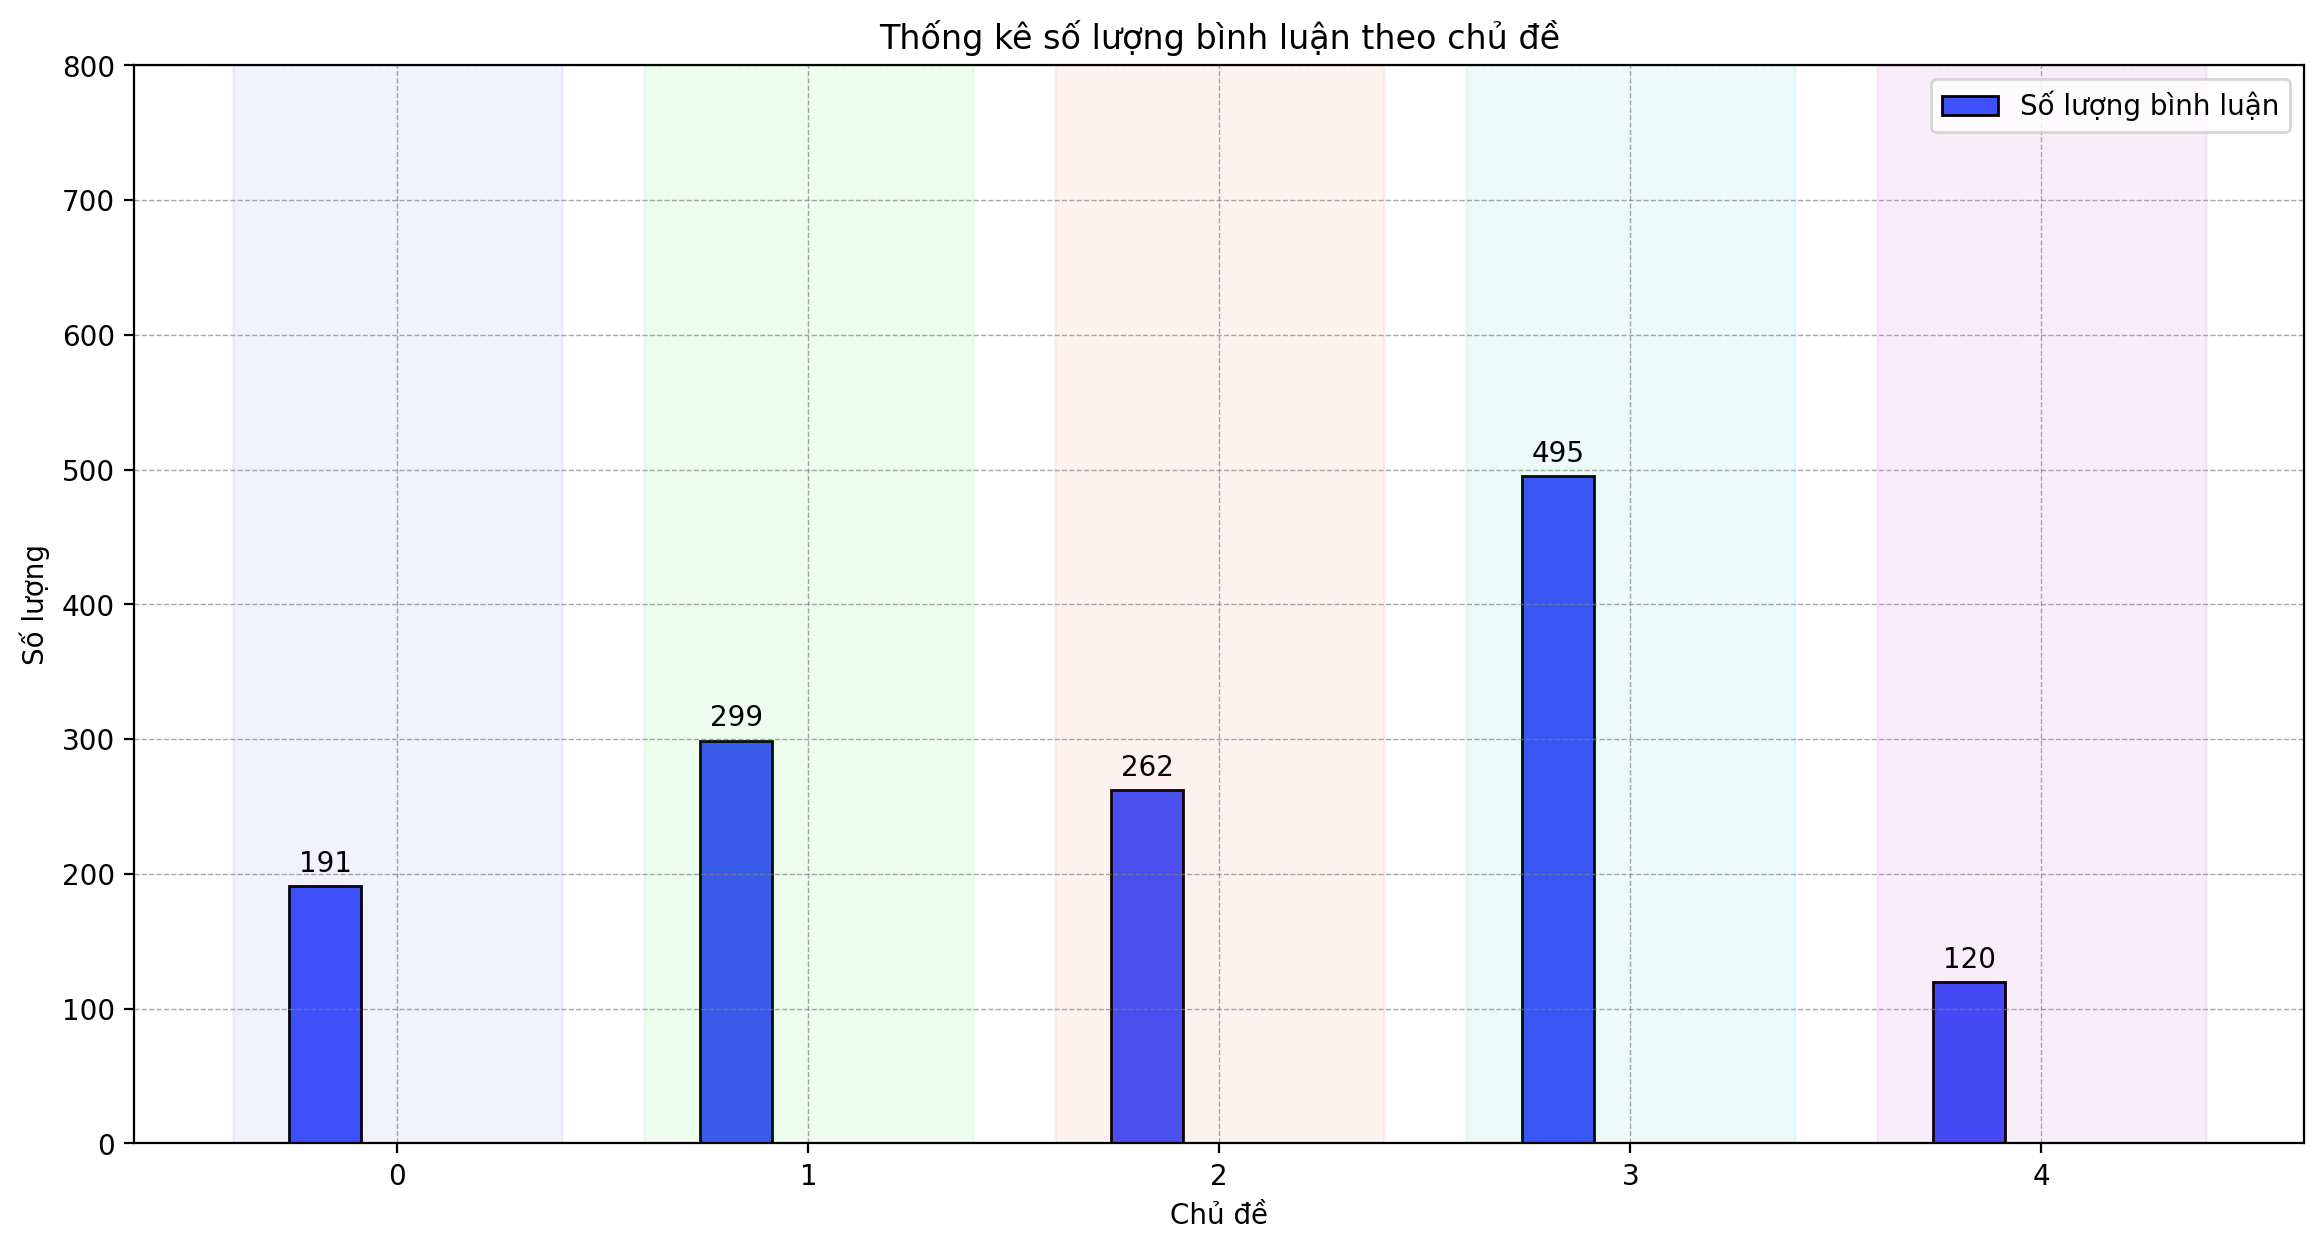

In [ ]:
plot_(_count_comments, "Thống kê số lượng bình luận theo chủ đề",800)

In [58]:
print(timestamps)
import datetime
import re

timestamps1 = [str(time).split()[0] for time in timestamps]
# print(timestamps1)
# for timestamp in timestamps1:
#     print(timestamp)
#     datetime.datetime.strptime(timestamp, "%Y-%m-%d").date()
timestamp_ = [datetime.datetime.strptime(timestamp, "%Y-%m-%d").date() for timestamp in timestamps1]
print(timestamp_)
timestamp_ = [str(time.year)+'-'+str(time.month)+'-'+str(time.day) for time in timestamp_]
print(timestamp_)

['2022-10-12 19:58:21', '2023-11-24 10:02:19', '2023-11-23 09:12:34', '2023-11-22 07:57:12', '2023-11-15 22:35:56', '2023-11-20 10:46:08', '2023-11-18 08:52:31', '2023-11-17 21:46:06', '2023-11-16 21:41:49', '2023-11-16 16:44:32', '2023-11-16 23:16:00', '2023-11-14 15:54:38', '2023-11-13 17:35:09', '2023-11-09 00:31:54', '2023-11-07 16:18:12', '2023-11-08 16:13:53', '2023-11-07 10:11:00', '2023-10-28 20:28:53', '2023-10-29 19:57:07', '2023-09-27 22:55:13', '2023-11-08 09:52:26', '2023-10-25 19:32:33', '2023-10-27 10:44:03', '2023-11-06 07:56:32', '2023-10-27 15:00:32', '2023-10-28 18:57:43', '2022-10-30 08:49:31', '2022-10-30 08:49:31', '2023-10-27 20:12:46', '2023-10-27 20:04:21', '2023-10-27 12:00:47', '2023-10-24 20:40:28', '2023-10-19 17:13:03', '2023-10-24 20:18:50', '2023-10-25 17:50:42', '2023-10-23 09:50:28', '2023-10-18 20:01:10', '2023-10-18 12:18:46', '2023-10-18 00:17:27', '2023-10-16 16:07:49', '2023-10-15 20:43:26', '2023-10-14 10:07:40', '2023-10-13 10:13:06', '2023-10-1

ValueError: time data 'nan' does not match format '%Y-%m-%d'

In [ ]:
topics_over_time = topic_model.topics_over_time(docs, timestamp_, datetime_format="%Y-%m-%d", nr_bins=10)

8it [00:01,  6.06it/s]


In [ ]:
topic_model.visualize_topics_over_time(topics_over_time)

In [ ]:
import datetime
time = datetime.datetime.now()
topic_model.save(f"./models/model-{time}.pickle",serialization="pickle")

In [ ]:
papers.to_csv('./data_test/data_fb.csv',index=False)

In [ ]:
import pickle
def save_pickle(list_data, path):
    with open(path, 'wb') as f:
        pickle.dump(list_data, f)
        
def load_pickle_list(path):
    with open(path, 'rb') as f:
        return pickle.load(f)

save_pickle(docs,'./models/data/docs.pkl')
save_pickle(timestamp_,'./models/data/timestamp.pkl')
save_pickle(classes,'./models/data/classes.pkl')